In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pathlib import Path

In [83]:
# select the experiment for which you want to analyse data
EXPERIMENT_ID = 6

### Load Data

In [84]:
# set the paths
current_folder = globals()['_dh'][0]
results_path = os.path.join(current_folder,'results')
figures_path = os.path.join(current_folder,'plots')

# read the results data
df_data = pd.read_csv(os.path.join(results_path, f'experiment_{EXPERIMENT_ID}.csv'), index_col=0)

### Plot Offer and Transaction Prices

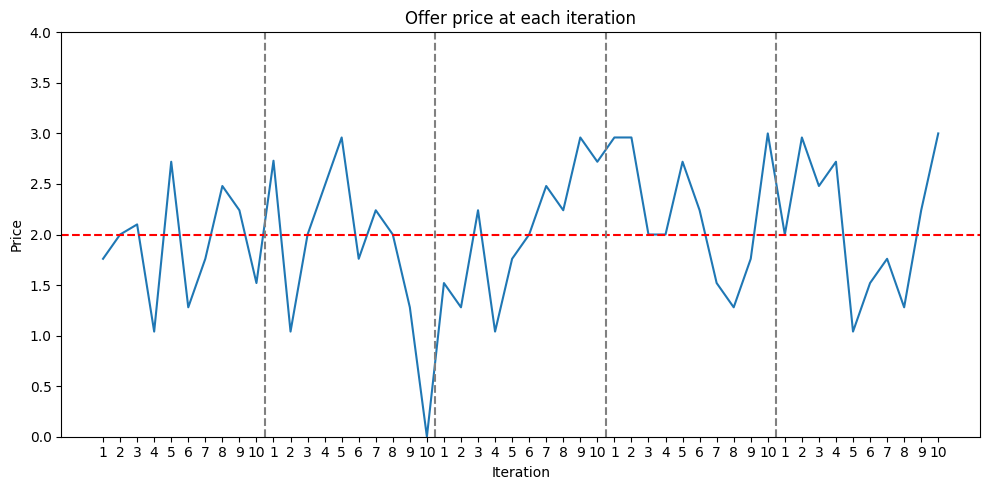

In [85]:
# plot the offer prices
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_data.index, y='price', markers='0', data=df_data)
plt.axhline(y=2, color='red', linestyle='--')
last_indices_in_round = df_data.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_data.index, labels=df_data['iteration'], rotation=0)
plt.title('Offer price at each iteration')
plt.xlabel('Iteration')
plt.ylabel('Price')
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

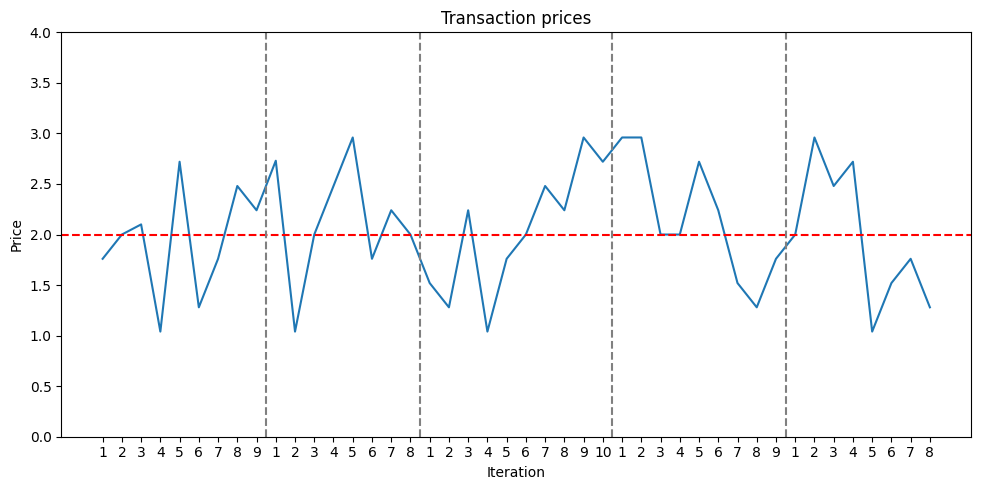

In [86]:
# plot the transaction prices
df_plot = df_data.loc[df_data['transaction']==True].reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_plot.index, y='price', markers='x', 
                data=df_plot)
plt.axhline(y=2, color='red', linestyle='--')
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title('Transaction prices')
plt.xlabel('Iteration')
plt.ylabel('Price')
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

### Analyse Profits

In [87]:
# calculate profits
df_data['announcer_profit'] = np.nan
df_data['responder_profit'] = np.nan
# df_data.loc[df_data['transaction']==False, ['responding_agent_reservation_price', 'responding_agent_id']] = None
df_data.loc[df_data['announcement_type']=='sell', 'announcer_profit'] = df_data['price'] - df_data['announcing_agent_reservation_price']
df_data.loc[df_data['announcement_type']=='buy', 'announcer_profit'] = df_data['announcing_agent_reservation_price'] - df_data['price']
df_data.loc[df_data['announcement_type']=='sell', 'responder_profit'] = df_data['responding_agent_reservation_price'] - df_data['price']
df_data.loc[df_data['announcement_type']=='buy', 'responder_profit'] = df_data['price'] - df_data['responding_agent_reservation_price']

# check whether no one violated the reservation price rule
df_data.loc[(df_data['announcer_profit']<0) | (df_data['responder_profit']<0)]

,round,iteration,price,announcement,transaction,announcement_type,announcing_agent_id,announcing_agent_reservation_price,responding_agent_id,responding_agent_reservation_price,announcer_profit,responder_profit
8,1,9,2.24,True,True,sell,6,2.24,5.0,2.0,0.0,-0.24
39,4,10,3.00,True,False,sell,10,3.20,NaN,NaN,-0.2,NaN
49,5,10,3.00,True,False,sell,10,3.20,NaN,NaN,-0.2,NaN


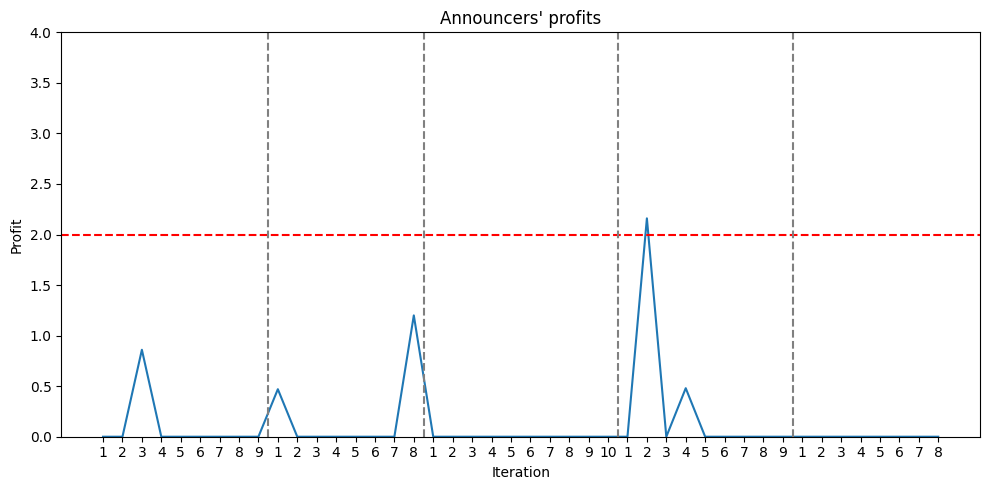

In [88]:
# plot the announcer profits
df_plot = df_data.loc[df_data['transaction']==True].reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_plot.index, y='announcer_profit', markers='x', 
                data=df_plot)
plt.axhline(y=2, color='red', linestyle='--')
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title("Announcers' profits")
plt.xlabel('Iteration')
plt.ylabel('Profit')
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

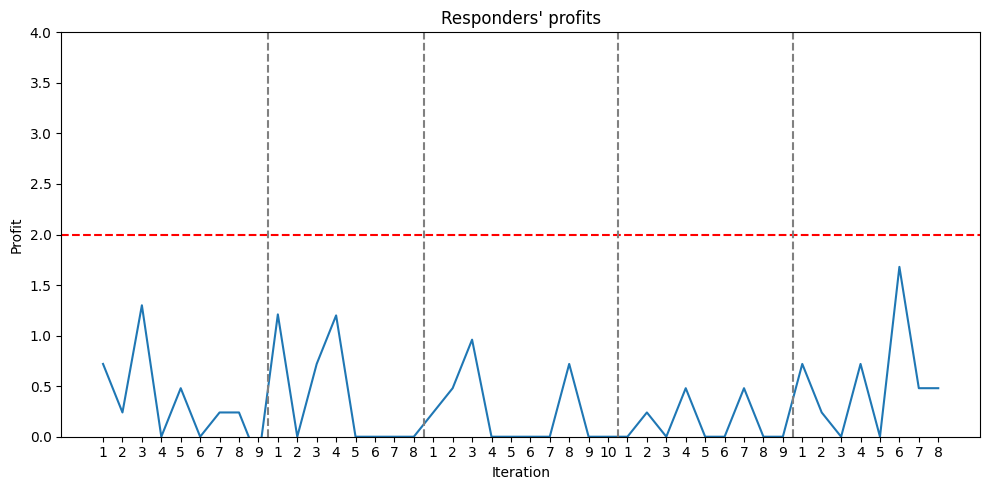

In [89]:
# plot the responder profits
df_plot = df_data.loc[df_data['transaction']==True].reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_plot.index, y='responder_profit', markers='x', 
                data=df_plot)
plt.axhline(y=2, color='red', linestyle='--')
last_indices_in_round = df_plot.groupby('round')['iteration'].apply(lambda g: g.index.max())
for x in last_indices_in_round[:-1]:
    plt.axvline(x=x+0.5, color='grey', linestyle='--', linewidth=1.5)
plt.xticks(ticks=df_plot.index, labels=df_plot['iteration'], rotation=0)
plt.title("Responders' profits")
plt.xlabel('Iteration')
plt.ylabel('Profit')
plt.tight_layout()
plt.ylim(0, 4)
plt.show()

### Analyse Announcements

In [90]:
zero_profit_share_announcers = len(df_data.loc[df_data['announcer_profit']==0])/len(df_data)
zero_profit_share_responders = len(df_data.loc[df_data['responder_profit']==0])/len(df_data)
average_profit_announcers = df_data['announcer_profit'].mean()
average_profit_responders = df_data['responder_profit'].mean()

print(f"Share of announcers whose profit is zero: {zero_profit_share_announcers:.2f}")
print(f"Share of responders whose profit is zero: {zero_profit_share_responders:.2f}")
print("\n")
print(f"Average profit for the announcers: ${average_profit_announcers:.2f}")
print(f"Average profit for the responders: ${average_profit_responders:.2f}")

Share of announcers whose profit is zero: 0.84
Share of responders whose profit is zero: 0.42


Average profit for the announcers: $0.11
Average profit for the responders: $0.32


In [91]:
zero_profit_share_announcers_buyers = len(df_data.loc[(df_data['announcer_profit']==0) & (df_data['announcement_type']=="buy")])/len(df_data)
zero_profit_share_announcers_sellers = len(df_data.loc[(df_data['announcer_profit']==0) & (df_data['announcement_type']=="sell")])/len(df_data)

print(f"Share of buy announcers whose profit is zero: {zero_profit_share_announcers_buyers:.2f}")
print(f"Share of sell announcers whose profit is zero: {zero_profit_share_announcers_sellers:.2f}")


Share of buy announcers whose profit is zero: 0.44
Share of sell announcers whose profit is zero: 0.40
